# 生成图片、加噪声、背景、模糊

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
# -*- coding: utf-8 -*-
import numpy as np
#import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import random 
import cv2
import matplotlib.pyplot as plt
alphabet = 'abcdefgABCDEFG1234567890.:[]■□题'
fontsize = 30
fontName = u"simsunb.ttf"
color=(0, 0, 0)

def random_captcha_text(char_set=alphabet,captcha_size=6):    # 可以设置只用来生成数字
    captcha_text = []
    for i in range(captcha_size):
        c = random.choice(char_set)
        captcha_text.append(c)
    return captcha_text
captcha_text = random_captcha_text(captcha_size=8)     # 生成数字
captcha_text = ''.join(captcha_text)  # 生成标签

[226  23  23  23  23  23  23  45 197  23  23  23  23  23  23  74 251 219
 219 219 219 219 161  23 191  17 219 219 219 219 219 227 141  96  96  96
  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96
  96 216 187  23 191  19  72 181 204 204 204 204 204 204 204 204 204 204
 204 204 204 204 204 204 204 204 204 204  63 192 213 111  55  45  61 116
 218 187  23 190  95  95  95  95  95  95  98 112 152 227 254 169  84  50
  51  87 178 100  95  95  95  95  95  95  95  95 160 191  19  72 228  80
 192 125  48 185 246 254 204  63   7 168 187  23 247 225  40   0 128 232
 234 208 158  42   4 128 245  70  28 179 250 251 191  40  86 251 251   0
   0   0   0   0   0   0   0   0 144 191  19  72 228  80 192 136  19 233
 245  25   7 220 187  23  87   0 199 249  60   0 170  92   1 207 227  14
 108 237  34 223 223 223 223 223 223 223 223 245 191  19  72 228  80 192
 250  16  77 132   0 117 187  23  87   0 199 180   0  74 208   0  67 112
   2 212 223  53 191  19  72 228  80 192 212   0  3

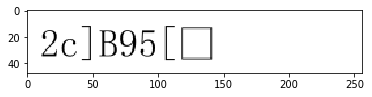

In [27]:



    
image = Image.new("RGB", (256, 48), (255, 255, 255))  # 注意因为pytorch dataloader 加载数据需要加载定长的数据，所以长、宽写死
font = ImageFont.truetype(fontName, fontsize)
draw = ImageDraw.Draw(image)
draw.text((10, 10), captcha_text, fill=color, font=font)
imga = image
imga = imga.convert('L')
imga = np.array(imga)
print(imga[imga!=255])
plt.imshow(image,'brg')
plt.show()



# 设置背景

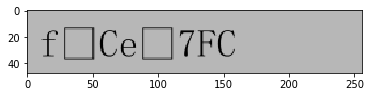

In [9]:
def random_color(start, end, opacity=None):
    red = random.randint(start, end)
    green = random.randint(start, end)
    blue = random.randint(start, end)
    if opacity is None:
        return (red, green, blue)
    return (red, green, blue, opacity)

background = random_color(170, 255)
image = Image.new("RGB", (256, 48), background)  # 注意因为pytorch dataloader 加载数据需要加载定长的数据，所以长、宽写死
font = ImageFont.truetype(fontName, fontsize)
draw = ImageDraw.Draw(image)
draw.text((10, 10), captcha_text, fill=color, font=font)
image = image.convert('L')
plt.imshow(image,'gray')
plt.show()

# 加噪点

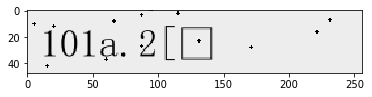

In [74]:
background = random_color(170, 255)
image = Image.new("RGB", (256, 48), background)  # 注意因为pytorch dataloader 加载数据需要加载定长的数据，所以长、宽写死
font = ImageFont.truetype(fontName, fontsize)
draw = ImageDraw.Draw(image)
draw.text((10, 10), captcha_text, fill=color, font=font)
color = (0,0,0)
# 加噪点
w, h = image.size
number=14
width=2
while number:
    x1 = random.randint(0, w)
    y1 = random.randint(0, h)
    draw.line(((x1, y1), (x1 - 1, y1 - 1)), fill=color, width=width)
    number -= 1

image = image.convert('L')
plt.imshow(image,'gray')
plt.show()



# 图片扭曲

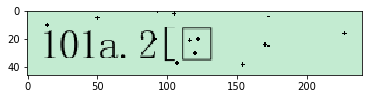

In [89]:
background = random_color(170, 255)
image = Image.new("RGB", (256, 48), background)  # 注意因为pytorch dataloader 加载数据需要加载定长的数据，所以长、宽写死
font = ImageFont.truetype(fontName, fontsize)
draw = ImageDraw.Draw(image)
draw.text((10, 10), captcha_text, fill=color, font=font)
color = (0,0,0)
# 加噪点
w, h = image.size
r_x = 250/w

number=14
width=2
while number:
    x1 = random.randint(0, w)
    y1 = random.randint(0, h)
    draw.line(((x1, y1), (x1 - 1, y1 - 1)), fill=color, width=width)
    number -= 1

# 重设置大小    
image = image.resize((240,int(h*r_x)))

plt.imshow(image,'gray')
plt.show()

#  灰度图装黑白图

(48, 256)
[250 248 251 ... 250 246 250]


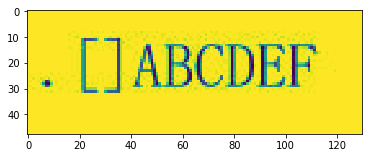

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
(48, 130)


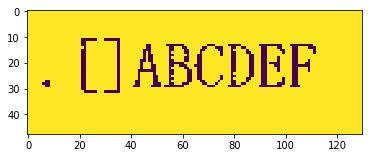

In [28]:
# https://blog.csdn.net/GZHermit/article/details/72758641
def random_color(start, end, opacity=None):
    red = random.randint(start, end)
    green = random.randint(start, end)
    blue = random.randint(start, end)
    if opacity is None:
        return (red, green, blue)
    return (red, green, blue, opacity)

background = random_color(170, 255)
image = Image.new("RGB", (256, 48), background)  # 注意因为pytorch dataloader 加载数据需要加载定长的数据，所以长、宽写死
font = ImageFont.truetype(fontName, fontsize)
draw = ImageDraw.Draw(image)
draw.text((10, 10), captcha_text, fill=color, font=font)
# plt.imshow(image)
# plt.show(image)
image = image.convert('L')

imga = np.array(image)
print(imga.shape)
imga = cv2.imread('/home/hecong/8.jpg',cv2.IMREAD_GRAYSCALE)
print(imga[imga!=255])
plt.imshow(imga)
plt.show()
(thresh, im_bw) = cv2.threshold(imga, 100, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(im_bw[im_bw!=255])
print(im_bw.shape)
cv2.imwrite('/home/hecong/1.png',im_bw)
plt.imshow(im_bw)
plt.show()

# 图片去噪点， 字体变清楚

    https://www.server110.com/python/201308/117.html
    
    https://blog.csdn.net/zangle260/article/details/52981008
    
    
    1. 腐蚀操作描述为：扫描图像的每一个像素，用结构元素与其覆盖的二值图像做“与”操作：如果都为1，结果图像的该像素为1，否则为0。
    
    2. 膨胀操作描述为：扫描图像的每一个像素，用结构元素与其覆盖的二值图像做“与”操作：如果都为0，结果图像的该像素为0，否则为1。
    
    两者的参数相同：
    
    src:原图像。
    dst：目标图像。
    element:腐蚀操作的内核。 如果不指定，默认为一个简单的 3x3 矩阵。否则，我们就要明确指定它的形状，可以使用函数getStructuringElement().
    anchor:默认为Point(-1,-1),内核中心点。省略时为默认值。
    iterations:腐蚀次数。省略时为默认值1。
    borderType:推断边缘类型，具体参见borderInterpolate函数。默认为BORDER_DEFAULT，省略时为默认值。
    borderValue:边缘值，具体可参见createMorphoogyFilter函数。可省略。  
    
    3. 函数getStructuringElement()来制作操作内核
    Mat getStructuringElement(int shape, Size esize, Point anchor=Point(-1,-1));
    shape:内核形状，主要有MORPH_RECT,MORPH_CROSS和MORPH_ELLIPSE,分别为矩形、椭圆形和交叉形，对应的值分别为0，1，2
    
    esize:内核大小。
    anchor:内核锚点，默认为内核中心点。

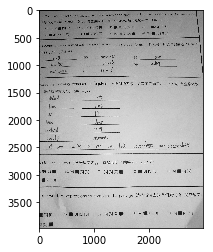

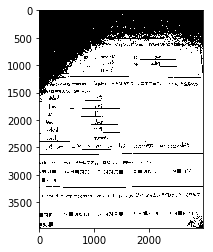

<class 'numpy.ndarray'>


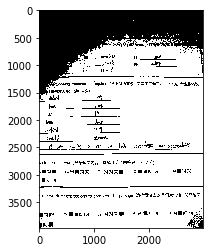

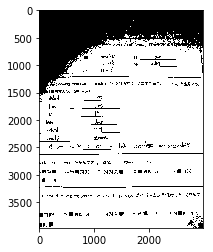

True

In [28]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import matplotlib.pyplot as plt
erosion_size = 0
max_elem = 2
max_kernel_size = 21
# title_trackbar_element_type = 'Element:\n 0: Rect \n 1: Cross \n 2: Ellipse'
# title_trackbar_kernel_size = 'Kernel size:\n 2n +1'
title_erosion_window = 'Erosion Demo'
title_dilatation_window = 'Dilation Demo'
def erosion(val):
#     erosion_size = cv.getTrackbarPos(title_trackbar_kernel_size, title_erosion_window)
    erosion_type = 0
#     val_type = cv.getTrackbarPos(title_trackbar_element_type, title_erosion_window)
    erosion_size =1
    val_type = 0
    if val_type == 0:
        erosion_type = cv.MORPH_RECT
    elif val_type == 1:
        erosion_type = cv.MORPH_CROSS
    elif val_type == 2:
        erosion_type = cv.MORPH_ELLIPSE
    element = cv.getStructuringElement(erosion_type, (2*erosion_size , 2*erosion_size+1), (erosion_size, erosion_size))
    erosion_dst = cv.erode(src, element)
    
    print(type(erosion_dst))
    plt.imshow(erosion_dst,'gray')
    plt.show()
    return erosion_dst
#     cv.imshow(erosion_dst)
def dilatation(val):
#     dilatation_size = cv.getTrackbarPos(title_trackbar_kernel_size, title_dilatation_window)
    dilatation_type = 0
#     val_type = cv.getTrackbarPos(title_trackbar_element_type, title_dilatation_window)
    dilatation_size =1
    val_type = 0
    if val_type == 0:
        dilatation_type = cv.MORPH_RECT
    elif val_type == 1:
        dilatation_type = cv.MORPH_CROSS
    elif val_type == 2:
        dilatation_type = cv.MORPH_ELLIPSE
    element = cv.getStructuringElement(dilatation_type, (2*dilatation_size, 2*dilatation_size+1), (dilatation_size, dilatation_size))
    dilatation_dst = cv.dilate(src, element)
#     cv.imshow(dilatation_dst)
    plt.imshow(dilatation_dst,'gray')
    plt.show()
    return dilatation_dst
    
# parser = argparse.ArgumentParser(description='Code for Eroding and Dilating tutorial.')
# parser.add_argument('--input', help='Path to input image.', default='../data/LinuxLogo.jpg')
# args = parser.parse_args()
src = cv.imread('/home/hecong/t001.jpg',cv.IMREAD_GRAYSCALE)
plt.imshow(src,'gray')
plt.show()
(thresh, src) = cv.threshold(src, 20, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(src,'gray')
plt.show()

if src is None:
    print('Could not open or find the image: ', args.input)
    exit(0)
# cv.namedWindow(title_erosion_window)
# cv.createTrackbar(title_trackbar_element_type, title_erosion_window , 0, max_elem, erosion)
# cv.createTrackbar(title_trackbar_kernel_size, title_erosion_window , 0, max_kernel_size, erosion)
# cv.namedWindow(title_dilatation_window)
# cv.createTrackbar(title_trackbar_element_type, title_dilatation_window , 0, max_elem, dilatation)
# cv.createTrackbar(title_trackbar_kernel_size, title_dilatation_window , 0, max_kernel_size, dilatation)
src = erosion(0)
src = dilatation(0)

cv.imwrite('1.png',src)
# cv.waitKey()